In [9]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout

In [10]:
(x_train, y_train),(x_test, y_test) = cifar10.load_data()

In [11]:
x_train.shape

(50000, 32, 32, 3)

In [12]:
x_test.shape

(10000, 32, 32, 3)

In [13]:
#exploring the img data

label = ['airplane','automobile','bird','cat','deer','dog','frog',
         'horse','ship','truck']

In [14]:
label

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

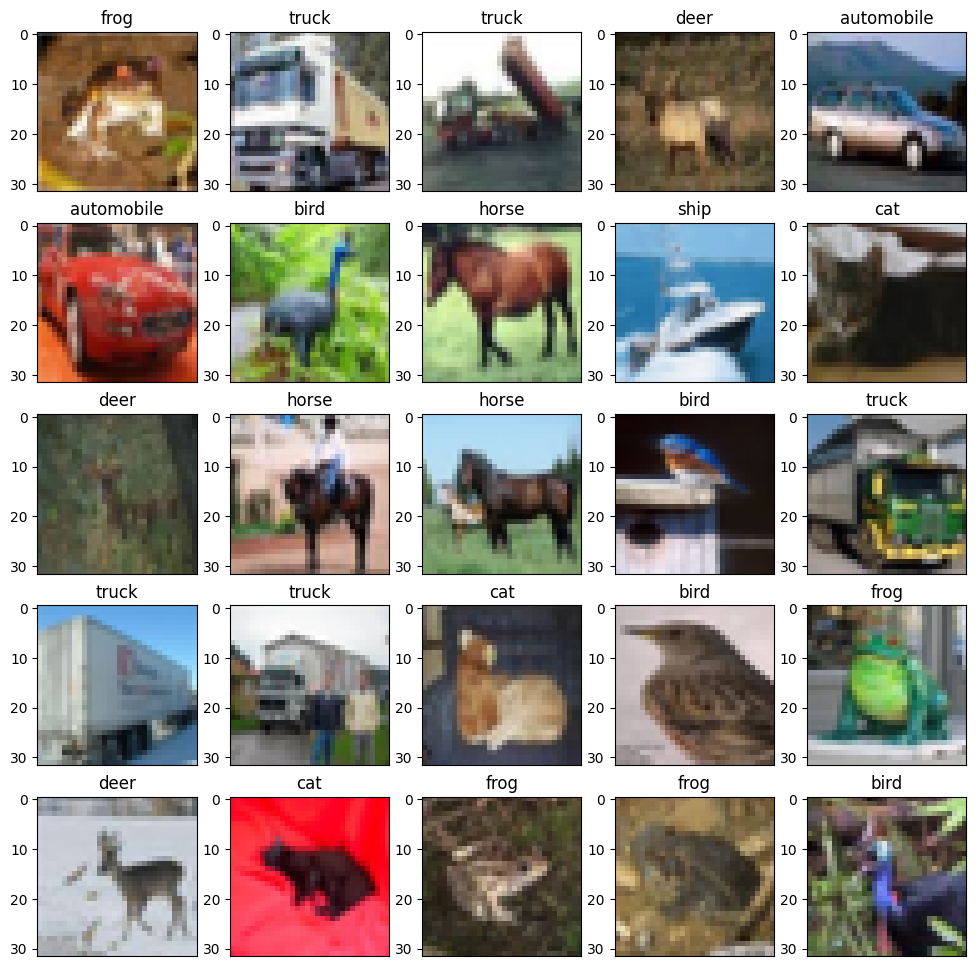

In [15]:
# display a 5x5 grid of random images from the training set with their
# labels

plt.figure(figsize=(12,12))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.title(label[y_train[i][0]])
    plt.imshow(x_train[i])

In [16]:
# the pixel value of the images are scaled between 0 to 1 by
# dividing it by 255

x_train = x_train/255
x_test = x_test/255

In [17]:
#one hot encoding

from keras.utils import to_categorical

In [18]:
y_train_new = to_categorical(y_train)
y_test_new = to_categorical(y_test)

In [19]:
y_train_new.shape

(50000, 10)

In [20]:
#build the model
model = Sequential()

# conv2D -> 2D convolutional layer.
# building block of CNNs,
model.add(Conv2D(filters=32, input_shape=(32,32,3), kernel_size=(3,3),
                 activation='relu'))

# maxpool downsamples the input by taking the maximum
# value in a local region.
model.add(MaxPool2D(pool_size=(2,2)))

# regularization
# It randomly sets a fraction of input units to 0 during training,
# which helps prevent overfitting.
model.add(Dropout(0.2))

# Adding More Convolutional Layers
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

#prepares the data for the fully connected layers.
model.add(Flatten())

# Adding Fully Connected Layers:
# The first dense layer has 512 units with ReLU activation.
# The final dense layer has 10 units with softmax activation,
# suitable for 10-class classification
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 15, 15, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 32)          1

In [23]:
#compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [24]:
#train the model

model.fit(x_train,y_train_new, epochs=15,batch_size=20)

Epoch 1/15
2500/2500 [==============================] - 88s 35ms/step - loss: 1.5686 - accuracy: 0.4215
Epoch 2/15
2500/2500 [==============================] - 76s 30ms/step - loss: 1.2466 - accuracy: 0.5518
Epoch 3/15
2500/2500 [==============================] - 76s 30ms/step - loss: 1.1254 - accuracy: 0.5973
Epoch 4/15
2500/2500 [==============================] - 79s 32ms/step - loss: 1.0470 - accuracy: 0.6243
Epoch 5/15
2500/2500 [==============================] - 77s 31ms/step - loss: 0.9911 - accuracy: 0.6470
Epoch 6/15
2500/2500 [==============================] - 75s 30ms/step - loss: 0.9438 - accuracy: 0.6653
Epoch 7/15
2500/2500 [==============================] - 75s 30ms/step - loss: 0.9085 - accuracy: 0.6774
Epoch 8/15
2500/2500 [==============================] - 78s 31ms/step - loss: 0.8778 - accuracy: 0.6899
Epoch 9/15
2500/2500 [==============================] - 75s 30ms/step - loss: 0.8483 - accuracy: 0.6996
Epoch 10/15
2500/2500 [==============================] - 76s 31m

In [25]:
model.evaluate(x_test, y_test_new, batch_size=1)

10000/10000 [==============================] - 28s 3ms/step - loss: 0.8995 - accuracy: 0.6935


[0.8995423913002014, 0.6934999823570251]

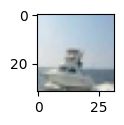

In [27]:
plt.figure(figsize=(1,1))
plt.imshow(x_train[100])

In [28]:
new = x_train[200]
new = new.reshape(1,32,32,3)
label[np.argmax(model.predict(new, verbose=0))]

# This predicts the class probabilities for the given input
# argmax -> finds the index of the class with
# highest probability

'frog'